# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [8]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [9]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [10]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 1,595 observations in the dataset

#### Question 2. Create a summary table

In [11]:
#df_raw.groupby('admit')['gre', 'gpa', 'prestige'].first()
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE would have a larger standard deviation that GPA becuase of the scale that the 2 variables; GPA from 0-4.0 and GRE from 260-340

#### Question 4. Drop data points with missing data


In [12]:
df_nm = df_raw.dropna()
df_nm

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [16]:
df_raw.isnull().values.ravel().sum()

5

In [14]:
df_nm.isnull().values.ravel().sum()

0

#### Question 6. Create box plots for GRE and GPA

<function matplotlib.pyplot.show>

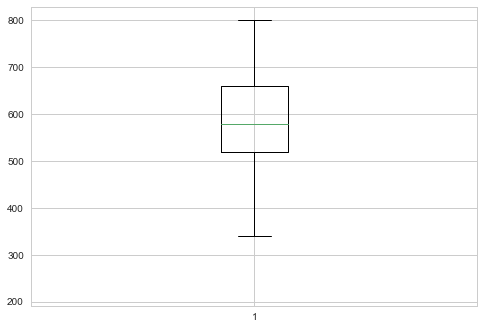

In [21]:
plt.boxplot(df_nm['gre'])
plt.show

<function matplotlib.pyplot.show>

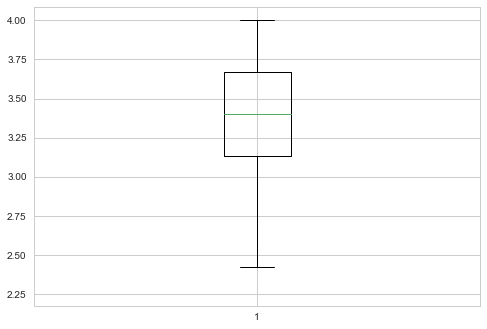

In [22]:
plt.boxplot(df_nm['gpa'])
plt.show

#### Question 7. What do this plots show?

Answer: These plots display the minimum, quartiles, median, and maximum values of a datasets distribution

#### Question 8. Describe each distribution 

In [39]:
from scipy import stats

stats.describe(df_nm['gre'])

DescribeResult(nobs=397L, minmax=(220.0, 800.0), mean=587.85894206549119, variance=13390.606315039564, skewness=-0.14549459322468603, kurtosis=-0.34376224249024645)

In [40]:
np.median(df_nm['gre'])

580.0

In [31]:
stats.describe(df_nm['gpa'])

DescribeResult(nobs=397L, minmax=(2.2599999999999998, 4.0), mean=3.3922418136020154, variance=0.14455834541892479, skewness=-0.21606859177891757, kurtosis=-0.5715724040825032)

In [41]:
np.median(df_nm['gpa'])

3.3999999999999999

In [32]:
stats.describe(df_nm['prestige'])

DescribeResult(nobs=397L, minmax=(1.0, 4.0), mean=2.4886649874055418, variance=0.89696715263465887, skewness=0.08617836207518219, kurtosis=-0.9048051933883952)

In [42]:
np.median(df_nm['prestige'])

2.0

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: If out model assumed a norma l distribution, we would not meet the requirement becuase 2 distributions (gre and gpa) are negatively skewed, the means and medians of the distributions are also not equal

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: To make the 2 variables more comparable, scaling the GRE down to a range that would transform it to a number that is closer to the range of the GPA figure.  Dividing the GRE variable by a factor of 100 achieves this comparability.

#### Question 11. Which of our variables are potentially colinear? 

In [45]:
np.corrcoef(df_nm)

array([[ 1.        ,  0.99998788,  0.9999775 , ...,  0.9999939 ,
         0.99998999,  0.99999604],
       [ 0.99998788,  1.        ,  0.99999625, ...,  0.99999896,
         0.99999929,  0.99999775],
       [ 0.9999775 ,  0.99999625,  1.        , ...,  0.99999364,
         0.99999726,  0.99999158],
       ..., 
       [ 0.9999939 ,  0.99999896,  0.99999364, ...,  1.        ,
         0.99999923,  0.99999977],
       [ 0.99998999,  0.99999929,  0.99999726, ...,  0.99999923,
         1.        ,  0.99999843],
       [ 0.99999604,  0.99999775,  0.99999158, ...,  0.99999977,
         0.99999843,  1.        ]])

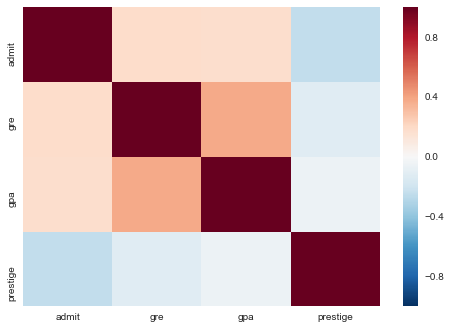

In [46]:
corr = df_nm.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Question 12. What did you find?

Answer: It apeaers that there is a strong correlation between the varibales GPA and GRE as well as strong,but not as stong correlation as GPA/GRE, and the admit variable.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: sumerize the quantitative characteristics of the varibales; describe the variables and their relationships to one another; identify whether the relationship is positively or negaitvely correlated

#### Question 14. What is your hypothesis? 

Answer: The higher the prestige of undergraduate schools will lead students to apply to higher prestige grad schools that have higher numbers of applicants and are therefore more selective resulting in lower rates of grad school admissions.  Lower prestige undergraduate students will apply to grad schools with higher admission rates; inveserse relationship between prestige and admission rates.  

## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    6a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?

1. a train error is an error that we get when we run a model back on the training data set; test errors occur when we run a model on data that it was not run on previously.
2. a low training error but high test error can be caused by a model that is overfitted to the dataset
3. the Lambda or cost function is a parameter that can be changed in order to reduce overfitting of a model.  Increasing the lambda variable will reduce the amount of overfitting of a model to a dataset.
4.  elasteicnet in the sklearn package would be used to explore the parameters
5. although LASSO and ridge regression both use penalty functions, they are calculated differently.  LASSO utilizes the sum of squares method 
6. instead of dropping the variable, an average of the other observations could be used in place of the missing variables